# Proyek Akhir: Menyelesaikan Permasalahan Perusahaan Edutech

- Nama: I Gede Agus Subawa
- Email: subawa116@gmail.com
- Id Dicoding: gedeaguss

## Persiapan

### Menyiapkan library yang dibutuhkan

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import collections
import joblib
import plotly.express as px

from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier


from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix, classification_report

from google.colab import files

### Menyiapkan data yang akan diguankan

## Data Understanding

In [2]:
# Dataset import from Dicoding GitHub Repository
dataset_url = 'https://raw.githubusercontent.com/dicodingacademy/dicoding_dataset/refs/heads/main/students_performance/data.csv'

# Read dataset
dataset = pd.read_csv(dataset_url, delimiter=';')
dataset

,Marital_status,Application_mode,Application_order,Course,Daytime_evening_attendance,Previous_qualification,Previous_qualification_grade,Nacionality,Mothers_qualification,Fathers_qualification,...,Curricular_units_2nd_sem_credited,Curricular_units_2nd_sem_enrolled,Curricular_units_2nd_sem_evaluations,Curricular_units_2nd_sem_approved,Curricular_units_2nd_sem_grade,Curricular_units_2nd_sem_without_evaluations,Unemployment_rate,Inflation_rate,GDP,Status
0,1,17,5,171,1,1,122.0,1,19,12,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,15,1,9254,1,1,160.0,1,1,3,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,9070,1,1,122.0,1,37,37,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,17,2,9773,1,1,122.0,1,38,37,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,39,1,8014,0,1,100.0,1,37,38,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4419,1,1,6,9773,1,1,125.0,1,1,1,...,0,6,8,5,12.666667,0,15.5,2.8,-4.06,Graduate
4420,1,1,2,9773,1,1,120.0,105,1,1,...,0,6,6,2,11.000000,0,11.1,0.6,2.02,Dropout
4421,1,1,1,9500,1,1,154.0,1,37,37,...,0,8,9,1,13.500000,0,13.9,-0.3,0.79,Dropout
4422,1,1,1,9147,1,1,180.0,1,37,37,...,0,5,6,5,12.000000,0,9.4,-0.8,-3.12,Graduate


## Data Preparation / Preprocessing

### Dataset Info

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 37 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   Marital_status                                4424 non-null   int64  
 1   Application_mode                              4424 non-null   int64  
 2   Application_order                             4424 non-null   int64  
 3   Course                                        4424 non-null   int64  
 4   Daytime_evening_attendance                    4424 non-null   int64  
 5   Previous_qualification                        4424 non-null   int64  
 6   Previous_qualification_grade                  4424 non-null   float64
 7   Nacionality                                   4424 non-null   int64  
 8   Mothers_qualification                         4424 non-null   int64  
 9   Fathers_qualification                         4424 non-null   i

The data contains information at the time of student enrollment, such as academic path, demographic information, and socio-economic factors, along with their academic performance at the conclusion of the first and second semesters.



*  Marital status - The marital status of the student
* Application mode - The method of application used by the student
* Application order - The order in which the student applied (between 0 - first choice; and 9 last choice)
* Course - The course taken by the student
* Daytime/evening attendance - Whether the student attends classes during the day or in the evening
* Previous qualification - The qualification obtained by the student before enrolling in higher education
* Previous qualification (grade) - Grade of previous qualification (between 0 and 200)
* Nacionality - The nationality of the student
* Mother's qualification - The qualification of the student's mother
* Father's qualification - The qualification of the student's father
* Mother's occupation - The occupation of the student's mother
* Father's occupation - The occupation of the student's father
* Admission grade - Admission grade (between 0 and 200)
* Displaced - Whether the student is a displaced person (1-yes, 0-no)
* Educational special needs - Whether the student has any special educational needs (1-yes, 0-no)
* Debtor - Whether the student is a debtor (1-yes, 0-no)
* Tuition fees up to date - Whether the student's tuition fees are up to date (1-yes, 0-no)
* Gender - The gender of the student (1-male, 0-female)
* Scholarship holder - Whether the student is a scholarship holder (1-yes, 0-no)
* Age at enrollment - The age of the student at the time of enrollment
* International - Whether the student is an international student (1-yes, 0-no)
* Curricular units 1st sem (credited) - The number of curricular units credited by the student in the first semester
* Curricular units 1st sem (enrolled) - The number of curricular units enrolled by the student in the first semester
* Curricular units 1st sem (evaluations) - The number of curricular units evaluated by the student in the first semester
* Curricular units 1st sem (approved) - The number of curricular units approved by the student in the first semester



In [ ]:
dataset.describe()

,Marital_status,Application_mode,Application_order,Course,Daytime_evening_attendance,Previous_qualification,Previous_qualification_grade,Nacionality,Mothers_qualification,Fathers_qualification,...,Curricular_units_1st_sem_without_evaluations,Curricular_units_2nd_sem_credited,Curricular_units_2nd_sem_enrolled,Curricular_units_2nd_sem_evaluations,Curricular_units_2nd_sem_approved,Curricular_units_2nd_sem_grade,Curricular_units_2nd_sem_without_evaluations,Unemployment_rate,Inflation_rate,GDP
count,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,...,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000
mean,1.178571,18.669078,1.727848,8856.642631,0.890823,4.577758,132.613314,1.873192,19.561935,22.275316,...,0.137658,0.541817,6.232143,8.063291,4.435805,10.230206,0.150316,11.566139,1.228029,0.001969
std,0.605747,17.484682,1.313793,2063.566416,0.311897,10.216592,13.188332,6.914514,15.603186,15.343108,...,0.690880,1.918546,2.195951,3.947951,3.014764,5.210808,0.753774,2.663850,1.382711,2.269935
min,1.000000,1.000000,0.000000,33.000000,0.000000,1.000000,95.000000,1.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.600000,-0.800000,-4.060000
25%,1.000000,1.000000,1.000000,9085.000000,1.000000,1.000000,125.000000,1.000000,2.000000,3.000000,...,0.000000,0.000000,5.000000,6.000000,2.000000,10.750000,0.000000,9.400000,0.300000,-1.700000
50%,1.000000,17.000000,1.000000,9238.000000,1.000000,1.000000,133.100000,1.000000,19.000000,19.000000,...,0.000000,0.000000,6.000000,8.000000,5.000000,12.200000,0.000000,11.100000,1.400000,0.320000
75%,1.000000,39.000000,2.000000,9556.000000,1.000000,1.000000,140.000000,1.000000,37.000000,37.000000,...,0.000000,0.000000,7.000000,10.000000,6.000000,13.333333,0.000000,13.900000,2.600000,1.790000
max,6.000000,57.000000,9.000000,9991.000000,1.000000,43.000000,190.000000,109.000000,44.000000,44.000000,...,12.000000,19.000000,23.000000,33.000000,20.000000,18.571429,12.000000,16.200000,3.700000,3.510000


In [ ]:
dataset.describe(include='object').T

,count,unique,top,freq
Status,4424,3,Graduate,2209


In [ ]:
#Check Missing Values
dataset.isnull().sum()

,0
Marital_status,0
Application_mode,0
Application_order,0
Course,0
Daytime_evening_attendance,0
Previous_qualification,0
Previous_qualification_grade,0
Nacionality,0
Mothers_qualification,0
Fathers_qualification,0


In [ ]:
# Check duplicated data
dataset.duplicated().sum()

np.int64(0)

In [3]:
# Label Decoding
def label_decoding(df, feature):
    """
    Transform encoded feature in a DataFrame to their respective categorical labels

    Parameters
        df (pandas.DataFrame) : The DataFrame containing the feature to be transformed
        feature (str or list of str) : The name of the feature to be transformed

    Returns
        pandas.DataFrame : The DataFrame with the specified feature as categorical labels
    """

    category_mappings = {
        'Marital_status': {1: 'Single', 2: 'Married', 3: 'Widower', 4: 'Divorced',
                           5: 'Facto Union', 6: 'Legally Seperated'},
        'Daytime_evening_attendance': {0: 'Evening', 1: 'Daytime'},
        'Gender': {0: 'Female', 1: 'Male'},
        'Application_mode' : {
            1: '1st Phase - General Contingent',
            2: 'Ordinance No. 612/93',
            5: '1st Phase - Special Contingent (Azores Island)',
            7: 'Holders of Other Higher Courses',
            10: 'Ordinance No. 854-B/99',
            15: 'International Student (Bachelor)',
            16: '1st Phase - Special Contingent (Madeira Island)',
            17: '2nd Phase - General Contingent',
            18: '3rd Phase - General Contingent',
            26: 'Ordinance No. 533-A/99, Item B2 (Different Plan)',
            27: 'Ordinance No. 533-A/99, Item B3 (Other Institution)',
            39: 'Over 23 Years Old',
            42: 'Transfer',
            43: 'Change of Course',
            44: 'Technological Specialization Diploma Holders',
            51: 'Change of Institution/Course',
            53: 'Short Cycle Diploma Holders',
            57: 'Change of Institution/Course (International)'
        },
        'Course': {
            33: 'Biofuel Production Technologies',
            171: 'Animation and Multimedia Design',
            8014: 'Social Service (Evening Attendance)',
            9003: 'Agronomy',
            9070: 'Communication Design',
            9085: 'Veterinary Nursing',
            9119: 'Informatics Engineering',
            9130: 'Equinculture',
            9147: 'Management',
            9238: 'Social Service',
            9254: 'Tourism',
            9500: 'Nursing',
            9556: 'Oral Hygiene',
            9670: 'Advertising and Marketing Management',
            9773: 'Journalism and Communication',
            9853: 'Basic Education',
            9991: 'Management (Evening Attendance)'
        },
        'Nacionality': {
            1: 'Portuguese', 2: 'German', 6: 'Spanish', 11: 'Italian',
            13: 'Dutch', 14: 'English', 17: 'Lithuanian', 21: 'Angolan',
            22: 'Cape Verdean', 24: 'Guinean', 25: 'Mozambican',
            26: 'Santomean', 32: 'Turkish', 41: 'Brazilian', 62: 'Romanian',
            100: 'Moldova (Republic of)', 101: 'Mexican', 103: 'Ukrainian',
            105: 'Russian', 108: 'Cuban', 109: 'Colombian'
        },
        'Qualification': {
            1: 'Secondary Education - 12th Year of Schooling or Eq.',
            2: "Higher Education - Bachelor's Degree",
            3: 'Higher Education - Degree',
            4: "Higher Education - Master's",
            5: 'Higher Education - Doctorate',
            6: 'Frequency of Higher Education',
            9: '12th Year of Schooling - Not Completed',
            10: '11th Year of Schooling - Not Completed',
            11: '7th Year (Old)',
            12: 'Other - 11th Year of Schooling',
            13: '2nd Year Complementary High School Course',
            14: '10th Year of Schooling',
            15: '10th Year of Schooling - Not Completed',
            18: 'General Commerce Course',
            19: 'Basic Education 3rd Cycle (9th/10th/11th Year) or Equiv.',
            20: 'Complementary High School Course',
            22: 'Technical - Professional Course',
            25: 'Complementary High School Course - Not Concluded',
            26: '7th Year of Schooling',
            27: '2nd Cycle of the General High School Course',
            29: '9th Year of Schooling - Not Completed',
            30: '8th Year of Schooling',
            31: 'General Course of Administration and Commerce',
            33: 'Supplementary Accounting and Administration',
            34: 'Unknown',
            35: "Can't Read or Write",
            36: 'Can Read Without Having a 4th Year of Schooling',
            37: 'Basic Education 1st Cycle (4th/5th Year) or Equiv.',
            38: 'Basic Education 2nd Cycle (6th/7th/8th Year) or Equiv.',
            39: 'Technological Specialization Course',
            40: 'Higher Education - Degree (1st Cycle)',
            41: 'Specialized Higher Studies Course',
            42: 'Professional Higher Technical Course',
            43: 'Higher Education - Master (2nd Cycle)',
            44: 'Higher Education - Doctorate (3rd Cycle)'
        },
        'Occupation': {
            0: 'Student',
            1: 'Representatives of the Legislative Power and Executive Bodies, Directors, Directors and Executive Managers',
            2: 'Specialists in Intellectual and Scientific Activities',
            3: 'Intermediate Level Technicians and Professions',
            4: 'Administrative Staff',
            5: 'Personal Services, Security and Safety Workers and Sellers',
            6: 'Farmers and Skilled Workers in Agriculture, Fisheries and Forestry',
            7: 'Skilled Workers in Industry, Construction and Craftsmen',
            8: 'Installation and Machine Operators and Assembly Workers',
            9: 'Unskilled Workers',
            10: 'Armed Forces Professions',
            90: 'Other Situation',
            99: '(Blank)',
            101: 'Armed Forces Officers',
            102: 'Armed Forces Sergeants',
            103: 'Other Armed Forces Personnel',
            112: 'Directors of Administrative and Commercial Services',
            114: 'Hotel, Catering, Trade and Other Services Directors',
            121: 'Specialists in the Physical Sciences, Mathematics, Engineering and Related Techniques',
            122: 'Health Professionals',
            123: 'Teachers',
            124: 'Specialists in Finance, Accounting, Administrative Organization, Public and Commercial Relations',
            125: 'Specialists in Information and Communication Technologies (ICT)',
            131: 'Intermediate Level Science and Engineering Technicians and Professions',
            132: 'Technicians and Professionals, of Intermediate Level of Health',
            134: 'Intermediate Level Technicians From Legal, Social, Sports, Cultural and Similar Services',
            135: 'Information and Communication Technology Technicians',
            141: 'Office Workers, Secretaries in General and Data Processing Operators',
            143: 'Data, Accounting, Statistical, Financial Services and Registry-Related Operators',
            144: 'Other Administrative Support Staff',
            151: 'Personal Service Workers',
            152: 'Sellers',
            153: 'Personal Care Workers and the Like',
            154: 'Protection and Security Services Personnel',
            161: 'Market-Oriented Farmers and Skilled Agricultural and Animal Production Workers',
            163: 'Farmers, Livestock Keepers, Fishermen, Hunters and Gatherers, Subsistence',
            171: 'Skilled Construction Workers and the Like, Except Electricians',
            172: 'Skilled Workers in Metallurgy, Metalworking and Similar',
            173: 'Skilled Workers in Printing, Precision Instrument Manufacturing, Jewelers, Artisans and the Like',
            174: 'Skilled Workers in Electricity and Electronics',
            175: 'Workers in Food Processing, Woodworking, Clothing and Other Industries and Crafts',
            181: 'Fixed Plant and Machine Operators',
            182: 'Assembly Workers',
            183: 'Vehicle Drivers and Mobile Equipment Operators',
            191: 'Cleaning Workers',
            192: 'Unskilled Workers in Agriculture, Animal Production, Fisheries and Forestry',
            193: 'Unskilled Workers in Extractive Industry, Construction, Manufacturing and Transport',
            194: 'Meal Preparation Assistants',
            195: 'Street Vendors (Except Food) and Street Service Providers'
        }
    }

    category_mappings['Previous_qualification'] = category_mappings['Qualification']
    category_mappings['Mothers_qualification'] = category_mappings['Qualification']
    category_mappings['Fathers_qualification'] = category_mappings['Qualification']
    category_mappings['Mothers_occupation'] = category_mappings['Occupation']
    category_mappings['Fathers_occupation'] = category_mappings['Occupation']

    binary_features = ['Displaced', 'Educational_special_needs', 'Debtor',
                       'Tuition_fees_up_to_date', 'Scholarship_holder',
                       'International']
    binary_mapping = {0: 'No', 1: 'Yes'}

    features = [feature] if isinstance(feature, str) else feature

    for f in features:
        if f in category_mappings:
            df[f] = df[f].map(category_mappings[f])
        elif f in binary_features:
            df[f] = df[f].map(binary_mapping)

    return df

In [4]:
dataset_clean =  dataset.copy()
dataset_clean = label_decoding(dataset_clean, ['Marital_status', 'Application_mode', 'Course',
                                 'Daytime_evening_attendance',
                                 'Previous_qualification', 'Nacionality',
                                 'Mothers_qualification', 'Fathers_qualification',
                                 'Mothers_occupation', 'Fathers_occupation',
                                 'Displaced', 'Educational_special_needs' ,
                                 'Debtor', 'Tuition_fees_up_to_date', 'Gender',
                                 'Scholarship_holder', 'International'])

dataset_clean

,Marital_status,Application_mode,Application_order,Course,Daytime_evening_attendance,Previous_qualification,Previous_qualification_grade,Nacionality,Mothers_qualification,Fathers_qualification,...,Curricular_units_2nd_sem_credited,Curricular_units_2nd_sem_enrolled,Curricular_units_2nd_sem_evaluations,Curricular_units_2nd_sem_approved,Curricular_units_2nd_sem_grade,Curricular_units_2nd_sem_without_evaluations,Unemployment_rate,Inflation_rate,GDP,Status
0,Single,2nd Phase - General Contingent,5,Animation and Multimedia Design,Daytime,Secondary Education - 12th Year of Schooling o...,122.0,Portuguese,Basic Education 3rd Cycle (9th/10th/11th Year)...,Other - 11th Year of Schooling,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,Single,International Student (Bachelor),1,Tourism,Daytime,Secondary Education - 12th Year of Schooling o...,160.0,Portuguese,Secondary Education - 12th Year of Schooling o...,Higher Education - Degree,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,Single,1st Phase - General Contingent,5,Communication Design,Daytime,Secondary Education - 12th Year of Schooling o...,122.0,Portuguese,Basic Education 1st Cycle (4th/5th Year) or Eq...,Basic Education 1st Cycle (4th/5th Year) or Eq...,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,Single,2nd Phase - General Contingent,2,Journalism and Communication,Daytime,Secondary Education - 12th Year of Schooling o...,122.0,Portuguese,Basic Education 2nd Cycle (6th/7th/8th Year) o...,Basic Education 1st Cycle (4th/5th Year) or Eq...,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,Married,Over 23 Years Old,1,Social Service (Evening Attendance),Evening,Secondary Education - 12th Year of Schooling o...,100.0,Portuguese,Basic Education 1st Cycle (4th/5th Year) or Eq...,Basic Education 2nd Cycle (6th/7th/8th Year) o...,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4419,Single,1st Phase - General Contingent,6,Journalism and Communication,Daytime,Secondary Education - 12th Year of Schooling o...,125.0,Portuguese,Secondary Education - 12th Year of Schooling o...,Secondary Education - 12th Year of Schooling o...,...,0,6,8,5,12.666667,0,15.5,2.8,-4.06,Graduate
4420,Single,1st Phase - General Contingent,2,Journalism and Communication,Daytime,Secondary Education - 12th Year of Schooling o...,120.0,Russian,Secondary Education - 12th Year of Schooling o...,Secondary Education - 12th Year of Schooling o...,...,0,6,6,2,11.000000,0,11.1,0.6,2.02,Dropout
4421,Single,1st Phase - General Contingent,1,Nursing,Daytime,Secondary Education - 12th Year of Schooling o...,154.0,Portuguese,Basic Education 1st Cycle (4th/5th Year) or Eq...,Basic Education 1st Cycle (4th/5th Year) or Eq...,...,0,8,9,1,13.500000,0,13.9,-0.3,0.79,Dropout
4422,Single,1st Phase - General Contingent,1,Management,Daytime,Secondary Education - 12th Year of Schooling o...,180.0,Portuguese,Basic Education 1st Cycle (4th/5th Year) or Eq...,Basic Education 1st Cycle (4th/5th Year) or Eq...,...,0,5,6,5,12.000000,0,9.4,-0.8,-3.12,Graduate


In [ ]:
for feature in dataset_clean.select_dtypes(include='object'):
    print(feature)
    print(dataset_clean[feature].unique(), '\n')

Marital_status
['Single' 'Married' 'Divorced' 'Widower' 'Facto Union' 'Legally Seperated'] 

Application_mode
['2nd Phase - General Contingent' 'International Student (Bachelor)'
 '1st Phase - General Contingent' 'Over 23 Years Old'
 '3rd Phase - General Contingent' 'Short Cycle Diploma Holders'
 'Technological Specialization Diploma Holders'
 'Change of Institution/Course' 'Change of Course'
 'Holders of Other Higher Courses' 'Transfer'
 '1st Phase - Special Contingent (Madeira Island)'
 '1st Phase - Special Contingent (Azores Island)' 'Ordinance No. 612/93'
 'Ordinance No. 854-B/99' 'Change of Institution/Course (International)'
 'Ordinance No. 533-A/99, Item B2 (Different Plan)'
 'Ordinance No. 533-A/99, Item B3 (Other Institution)'] 

Course
['Animation and Multimedia Design' 'Tourism' 'Communication Design'
 'Journalism and Communication' 'Social Service (Evening Attendance)'
 'Management (Evening Attendance)' 'Nursing' 'Social Service'
 'Advertising and Marketing Management' 'Bas

In [5]:
#Label Encoding for status column
le = LabelEncoder()
dataset['Status'] = le.fit_transform(dataset['Status'])

dict(zip(le.classes_, le.transform(le.classes_)))

{'Dropout': np.int64(0), 'Enrolled': np.int64(1), 'Graduate': np.int64(2)}

In [ ]:
dataset_clean.to_csv("Data Student Cleaned.csv", index=False)

## EDA


### Korelasi Fitur

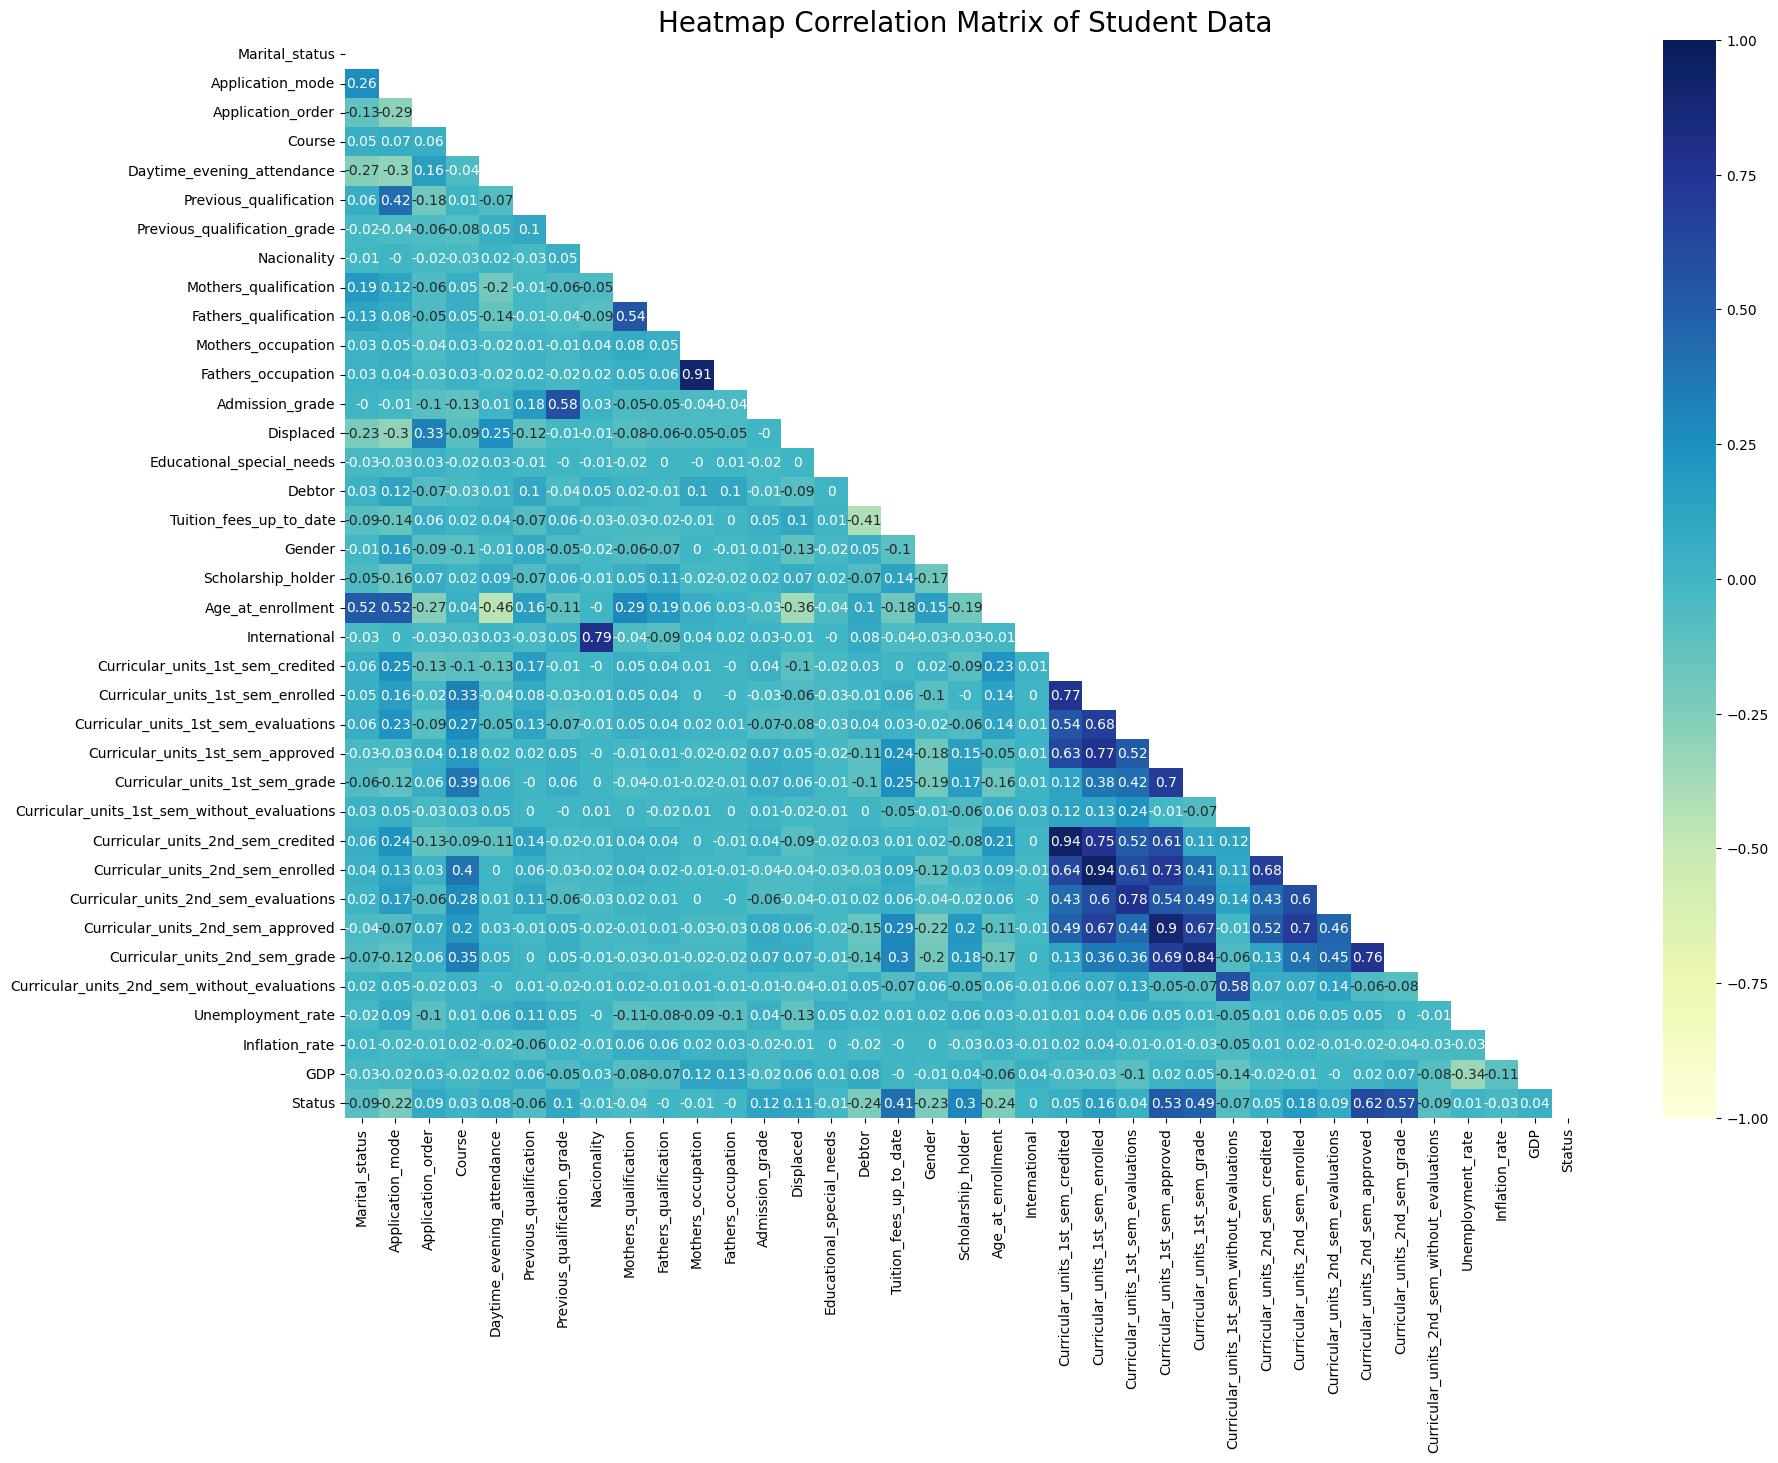

In [ ]:
plt.figure(figsize=(20, 14))
correlation_matrix = dataset.corr(numeric_only=True).round(2)
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))
sns.heatmap(correlation_matrix, vmin=-1, vmax=1,annot=True, cmap='YlGnBu', mask=mask)
plt.title('Heatmap Correlation Matrix of Student Data', size=20)
plt.show()

In [ ]:
# Hitung korelasi terhadap 'Status' dan buang korelasi dirinya sendiri
status_corr = dataset.corr()['Status'].drop('Status')

# Ambil hanya korelasi dengan nilai absolut > 0.2 (artinya di atas 20%)
filtered_corr = status_corr[status_corr.abs() > 0.2]

# Tampilkan hasilnya
filtered_corr.sort_values(ascending=False)

,Status
Curricular_units_2nd_sem_approved,0.624157
Curricular_units_2nd_sem_grade,0.566827
Curricular_units_1st_sem_approved,0.529123
Curricular_units_1st_sem_grade,0.485207
Tuition_fees_up_to_date,0.409827
Scholarship_holder,0.297595
Application_mode,-0.221747
Gender,-0.229270
Debtor,-0.240999
Age_at_enrollment,-0.243438


Mahasiswa yang berprestasi akademik sejak semester 1, aktif mengambil dan menyelesaikan mata kuliah, serta memiliki stabilitas finansial (tidak menunggak dan/atau dapat beasiswa) jauh lebih kecil kemungkinan dropout.

### Status

In [ ]:
status_ = dataset_clean['Status'].value_counts()
status_


,count
Status,
Graduate,2209
Dropout,1421
Enrolled,794


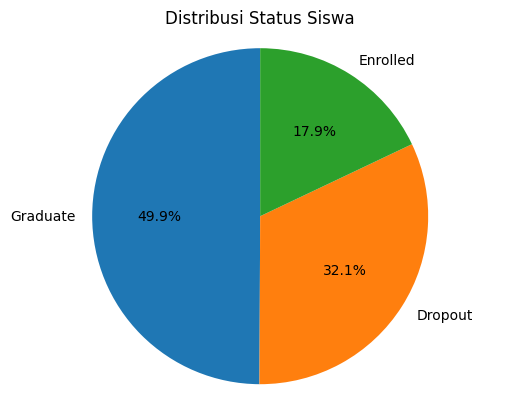

In [ ]:
plt.pie(status_, labels=status_.index, autopct='%1.1f%%', startangle=90)
plt.title('Distribusi Status Siswa')
plt.axis('equal')
plt.show()

Sebagian besar siswa (49,9%) berhasil lulus, namun persentase siswa yang dropout juga cukup tinggi, yaitu 32,1% atau sebanyak 1421 siswa, dibandingkan dengan jumlah siswa yang lulus sebanyak 2209

### Usia

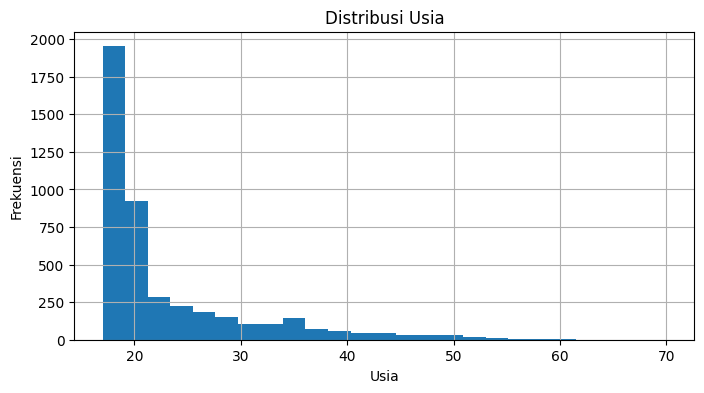

In [ ]:
plt.figure(figsize=(8, 4))
plt.hist(dataset_clean['Age_at_enrollment'], bins=25)
plt.title('Distribusi Usia')
plt.xlabel('Usia')
plt.ylabel('Frekuensi')
plt.grid()

Sebagian besar usia siswa berada di rentang usia muda yaitu 17 - 20 tahun. Distribusi usia terdapat skewed ke kanan yang artinya mayoritas berada di usia muda dengan jumlah yang menurun drastis pada usia lebih tua

### Gender

In [ ]:
gender_ = dataset_clean['Gender'].value_counts()
gender_

,count
Gender,
Female,2868
Male,1556


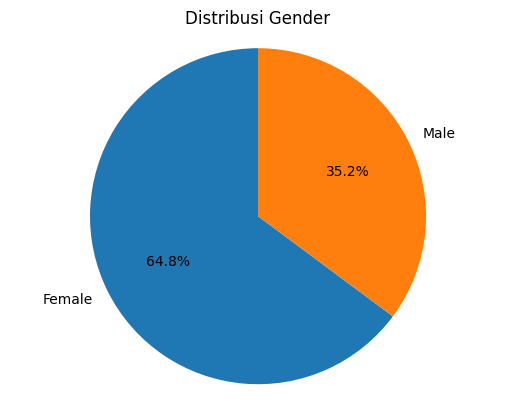

In [ ]:
plt.pie(gender_, labels=gender_.index, autopct='%1.1f%%', startangle=90)
plt.title('Distribusi Gender')
plt.axis('equal')
plt.show()

In [ ]:
# Membuat pivot table jumlah mahasiswa berdasarkan Status dan Debtor
tabel_gender = dataset_clean.groupby(['Status', 'Gender']).size().unstack(fill_value=0)

tabel_gender

Gender,Female,Male
Status,,
Dropout,720,701
Enrolled,487,307
Graduate,1661,548


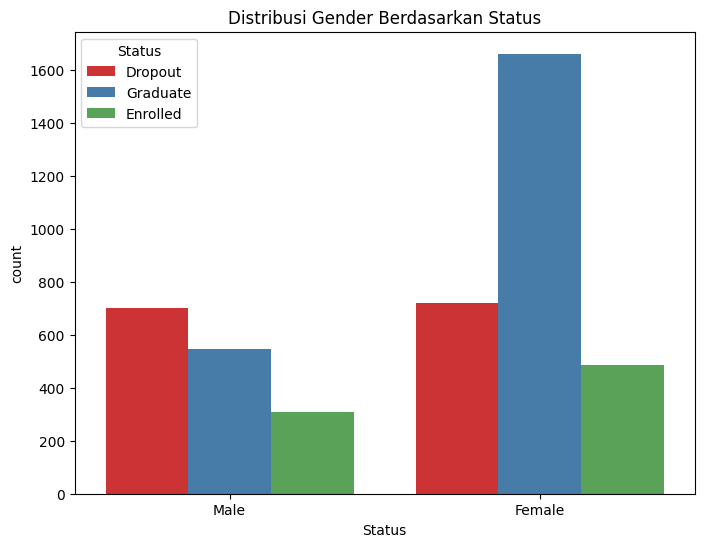

In [ ]:
# Barplot untuk melihat jumlah Gender berdasarkan Status
plt.figure(figsize=(8, 6))
sns.countplot(x='Gender', hue='Status', data=dataset_clean, palette='Set1')

plt.title('Distribusi Gender Berdasarkan Status')
plt.xlabel('Status')
plt.show()

Kesimpulan:
* Siswa perempuan mendominasi jumlah siswa dibandingkan dengan siswa laki-laki, dengan total masing-masing 2868 dan 1556 siswa
* Jumlah mahasiswa laki-laki dan perempuan yang dropout hampir seimbang, artinya resiko dropout tidak terlalu dipengaruhi oleh gender
* Jumlah mahasiswa yang lulus didominasi oleh perempuan dan menunjukkan mahasiswa perempuan cenderung memiliki tingkat kelulusan yang tinggi dibandingkan laki-laki

In [ ]:
dataset['Grade_diff_sem2_vs_sem1'] = dataset['Curricular_units_2nd_sem_grade'] - dataset['Curricular_units_1st_sem_grade']
dataset['Grade_diff_sem2_vs_sem1']

,Grade_diff_sem2_vs_sem1
0,0.000000
1,-0.333333
2,0.000000
3,-1.028571
4,0.666667
...,...
4419,-0.933333
4420,-1.000000
4421,-1.412500
4422,-1.800000


### Debtor

In [ ]:
debtor_ = dataset_clean['Debtor'].value_counts()
debtor_

,count
Debtor,
No,3921
Yes,503


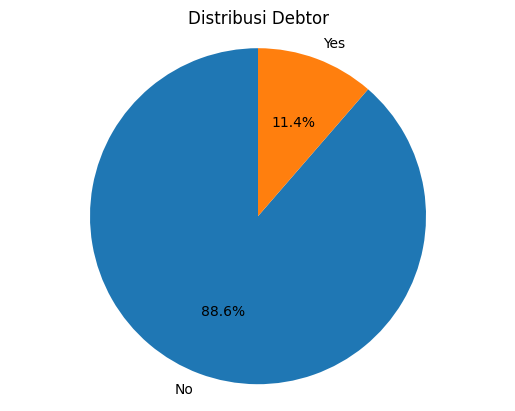

In [ ]:
plt.pie(debtor_, labels=debtor_.index, autopct='%1.1f%%', startangle=90)
plt.title('Distribusi Debtor')
plt.axis('equal')
plt.show()

In [ ]:
# Membuat pivot table jumlah mahasiswa berdasarkan Status dan Debtor
tabel_debtor = dataset_clean.groupby(['Status', 'Debtor']).size().unstack(fill_value=0)
tabel_debtor

Debtor,No,Yes
Status,,
Dropout,1109,312
Enrolled,704,90
Graduate,2108,101


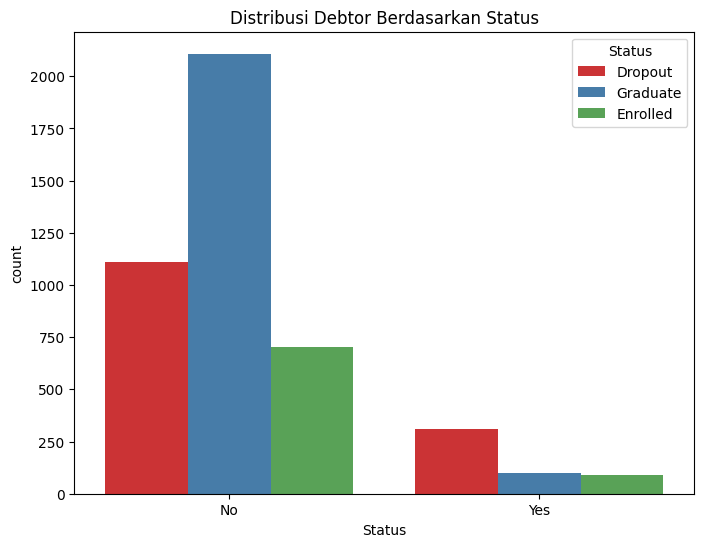

In [ ]:
plt.figure(figsize=(8, 6))
sns.countplot(x='Debtor', hue='Status', data=dataset_clean, palette='Set1')

plt.title('Distribusi Debtor Berdasarkan Status')
plt.xlabel('Status')
plt.show()

In [ ]:
pd.crosstab(dataset_clean['Status'], dataset_clean['Debtor'], normalize='index') * 100

Debtor,No,Yes
Status,,
Dropout,78.043631,21.956369
Enrolled,88.664987,11.335013
Graduate,95.427795,4.572205


In [ ]:
# Hitung total per status debtor
total_debtor_yes = len(dataset_clean[dataset_clean['Debtor'] == 'Yes'])
total_debtor_no = len(dataset_clean[dataset_clean['Debtor'] == 'No'])

# Hitung dropout per status debtor
dropout_debtor_yes = len(dataset_clean[(dataset_clean['Debtor'] == 'Yes') & (dataset_clean['Status'] == 'Dropout')])
dropout_debtor_no = len(dataset_clean[(dataset_clean['Debtor'] == 'No') & (dataset_clean['Status'] == 'Dropout')])

# Hitung rasio
ratio_dropout_debtor_yes = (dropout_debtor_yes / total_debtor_yes) * 100
ratio_dropout_debtor_no = (dropout_debtor_no / total_debtor_no) * 100

# Output hasil
print(f"Rasio dropout mahasiswa dengan utang: {ratio_dropout_debtor_yes:.2f}%")
print(f"Rasio dropout mahasiswa tanpa utang: {ratio_dropout_debtor_no:.2f}%")

Rasio dropout mahasiswa dengan utang: 62.03%
Rasio dropout mahasiswa tanpa utang: 28.28%


Kesimpulan:

Mayoritas mahasiswa yang lulus bukanlah debitur (tidak memiliki tunggakan pembayaran). Sebaliknya, mahasiswa yang dropout memiliki proporsi debitur yang lebih tinggi dibandingkan dengan yang lulus. Hal ini menunjukkan bahwa masalah keuangan berpotensi menjadi faktor signifikan yang menyebabkan mahasiswa dropout.

### Application Mode

In [ ]:
dataset_clean['Application_mode'].value_counts()

,count
Application_mode,
1st Phase - General Contingent,1708
2nd Phase - General Contingent,872
Over 23 Years Old,785
Change of Course,312
Technological Specialization Diploma Holders,213
Holders of Other Higher Courses,139
3rd Phase - General Contingent,124
Transfer,77
Change of Institution/Course,59


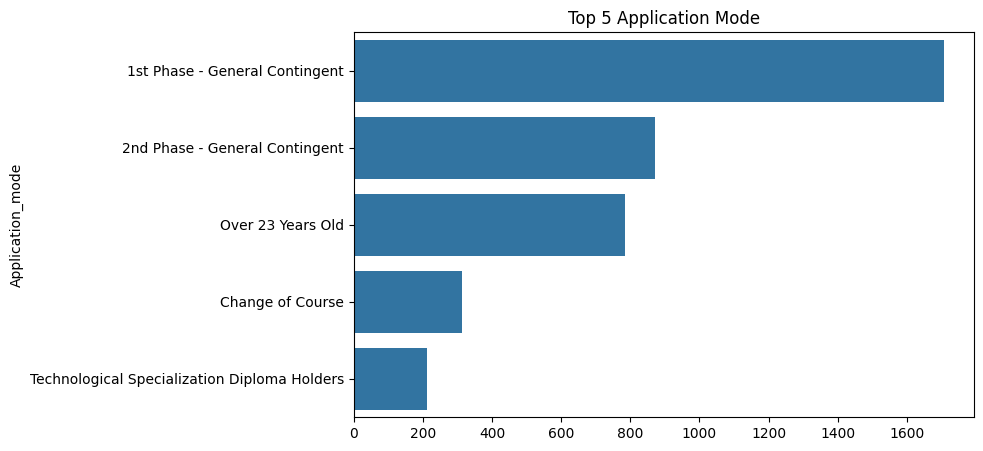

In [ ]:
# Ambil 5 kategori Application_mode terbanyak
top_5_modes = dataset_clean['Application_mode'].value_counts().nlargest(5)

# Buat barplot
plt.figure(figsize=(8, 5))
sns.barplot(y=top_5_modes.index, x=top_5_modes.values)

plt.title('Top 5 Application Mode')
plt.show()

In [ ]:
pd.crosstab(dataset_clean['Application_mode'], dataset_clean['Status'])

Status,Dropout,Enrolled,Graduate
Application_mode,,,
1st Phase - General Contingent,345,300,1063
1st Phase - Special Contingent (Azores Island),2,8,6
1st Phase - Special Contingent (Madeira Island),5,8,25
2nd Phase - General Contingent,256,159,457
3rd Phase - General Contingent,45,16,63
Change of Course,115,75,122
Change of Institution/Course,20,13,26
Change of Institution/Course (International),0,0,1
Holders of Other Higher Courses,85,7,47


Kesimpulan:

Berdasarkan distribusi status mahasiswa terhadap jalur masuk (application mode), terlihat bahwa jalur "1st Phase - General Contingent" merupakan yang paling dominan digunakan oleh mahasiswa. Jalur ini menyumbang jumlah lulusan terbanyak (1.063 orang), disertai dengan jumlah dropout dan mahasiswa aktif yang juga besar, masing-masing 345 dan 300. Hal ini menunjukkan bahwa jalur reguler ini cenderung berhasil mengantarkan sebagian besar mahasiswa hingga lulus.


Namun, beberapa jalur menunjukkan kecenderungan dropout yang tinggi. Jalur "Over 23 Years Old" mencatat angka dropout tertinggi kedua setelah jalur reguler, yaitu sebanyak 435 mahasiswa, dengan hanya 229 yang berhasil lulus. Ini mengindikasikan bahwa mahasiswa yang masuk melalui jalur usia dewasa mungkin menghadapi lebih banyak tantangan akademik atau personal, sehingga membutuhkan perhatian khusus. Selain itu, jalur "Change of Course" juga menunjukkan angka dropout yang cukup signifikan (115 orang), menandakan kemungkinan adanya kesulitan adaptasi atau ketidakcocokan jurusan baru yang menyebabkan mahasiswa gagal menyelesaikan studi.


Di sisi lain, jalur-jalur dengan jumlah mahasiswa yang lebih kecil seperti "Technological Specialization Diploma Holders" dan "Short Cycle Diploma Holders" menunjukkan performa yang cukup stabil, dengan proporsi kelulusan yang seimbang. Sementara itu, jalur-jalur khusus seperti "Ordinance No. 533-A/99" dan "Ordinance No. 612/93" memiliki jumlah mahasiswa yang sangat sedikit dan tidak menghasilkan kontribusi kelulusan yang berarti.


Secara keseluruhan, terlihat bahwa jalur masuk memiliki pengaruh terhadap keberhasilan studi mahasiswa. Jalur reguler seperti gelombang pertama umum (1st Phase) menunjukkan performa yang baik, sementara jalur dewasa atau pindahan cenderung lebih berisiko terhadap dropout. Hal ini dapat menjadi dasar untuk menetapkan strategi intervensi yang lebih terfokus terhadap kelompok mahasiswa dengan risiko lebih tinggi.

### Tuition Update

In [ ]:
dataset_clean['Tuition_fees_up_to_date'].value_counts()

,count
Tuition_fees_up_to_date,
Yes,3896
No,528


In [ ]:
pd.crosstab(dataset_clean['Status'], dataset_clean['Tuition_fees_up_to_date'])

Tuition_fees_up_to_date,No,Yes
Status,,
Dropout,457,964
Enrolled,42,752
Graduate,29,2180


In [ ]:
pd.crosstab(dataset_clean['Status'], dataset_clean['Tuition_fees_up_to_date'], normalize='index')*100

Tuition_fees_up_to_date,No,Yes
Status,,
Dropout,32.160450,67.839550
Enrolled,5.289673,94.710327
Graduate,1.312811,98.687189


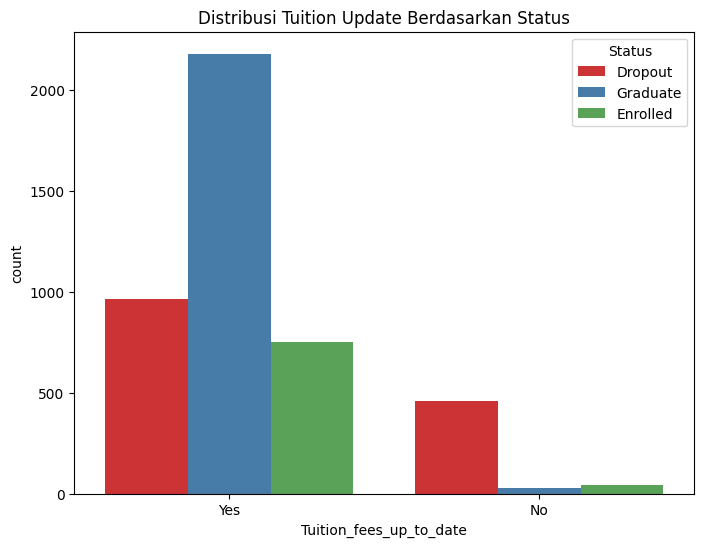

In [ ]:
plt.figure(figsize=(8, 6))
sns.countplot(x='Tuition_fees_up_to_date', hue='Status', data=dataset_clean, palette='Set1')

plt.title('Distribusi Tuition Update Berdasarkan Status')
plt.xlabel('Tuition_fees_up_to_date')
plt.show()

Kesimpulan:

Mayoritas mahasiswa memiliki status pembayaran uang kuliah yang lancar atau up to date, dengan jumlah 3.896 mahasiswa dibandingkan 528 mahasiswa yang menunggak. Namun, jika dilihat lebih dalam berdasarkan status mahasiswa, terlihat bahwa dari total mahasiswa dropout, sebanyak 457 orang (32,16%) memiliki tunggakan pembayaran, sedangkan hanya 67,84% yang membayar tepat waktu. Sebaliknya, mahasiswa yang enrolled dan graduate didominasi oleh pembayaran yang lancar, yaitu 94,71% dan 98,69% secara berturut-turut.

Dengan kata lain, mahasiswa yang tidak membayar tepat waktu cenderung memiliki kemungkinan lebih tinggi untuk dropout.

### Scholarship Holder

In [ ]:
dataset_clean['Scholarship_holder'].value_counts()

,count
Scholarship_holder,
No,3325
Yes,1099


In [ ]:
pd.crosstab(dataset_clean['Status'], dataset_clean['Scholarship_holder'])

Scholarship_holder,No,Yes
Status,,
Dropout,1287,134
Enrolled,664,130
Graduate,1374,835


In [ ]:
pd.crosstab(dataset_clean['Status'], dataset_clean['Scholarship_holder'], normalize='index')*100

Scholarship_holder,No,Yes
Status,,
Dropout,90.570021,9.429979
Enrolled,83.627204,16.372796
Graduate,62.200091,37.799909


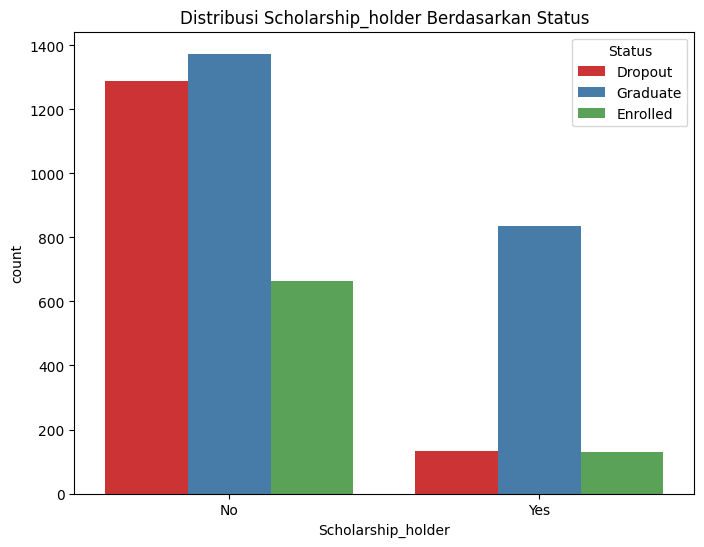

In [ ]:
plt.figure(figsize=(8, 6))
sns.countplot(x='Scholarship_holder', hue='Status', data=dataset_clean, palette='Set1')

plt.title('Distribusi Scholarship_holder Berdasarkan Status')
plt.xlabel('Scholarship_holder')
plt.show()

Kesimpulan:

Sebagian besar mahasiswa tidak menerima beasiswa dengan total 3325 mahasiswa dibandingkan 1099 mahasiswa yang menerima beasiswa. Dari total mahasiswa yang dropout, sekitar 90.57% diantaranya tidak memiliki beasiswa sedangkan hanya 9.43% yang menerima beasiswa. Dari mahasiswa yang lulus (graduate), sekitar 37,8% merupakan penerima beasiswa, dan proporsi ini jauh lebih tinggi dibandingkan pada kelompok dropout maupun yang masih aktif (enrolled).

Temuan ini menunjukkan bahwa mahasiswa penerima beasiswa cenderung memiliki tingkat kelulusan yang lebih tinggi dan tingkat dropout yang rendah. Beasiswa tampaknya berperan sebagai dukungan finansial atau motivasi tambahan yang dapat membantu mahasiswa menyelesaikan studinya dengan lebih baik.

### Marital Status

In [ ]:
dataset_clean['Marital_status'].value_counts()

,count
Marital_status,
Single,3919
Married,379
Divorced,91
Facto Union,25
Legally Seperated,6
Widower,4


In [ ]:
pd.crosstab(dataset_clean['Marital_status'], dataset_clean['Status'], margins=True)

Status,Dropout,Enrolled,Graduate,All
Marital_status,,,,
Divorced,42,16,33,91
Facto Union,11,3,11,25
Legally Seperated,4,1,1,6
Married,179,52,148,379
Single,1184,720,2015,3919
Widower,1,2,1,4
All,1421,794,2209,4424


In [ ]:
pd.crosstab(dataset_clean['Marital_status'], dataset_clean['Status'], normalize=True)*100

Status,Dropout,Enrolled,Graduate
Marital_status,,,
Divorced,0.949367,0.361664,0.745931
Facto Union,0.248644,0.067812,0.248644
Legally Seperated,0.090416,0.022604,0.022604
Married,4.046112,1.175407,3.345389
Single,26.763110,16.274864,45.547016
Widower,0.022604,0.045208,0.022604


In [ ]:
dataset_dropout = dataset_clean[dataset_clean['Status'] == 'Dropout']
marital_count = dataset_dropout['Marital_status'].value_counts()
fig = px.pie(
    names=marital_count.index,
    values=marital_count.values,
    title='Distribusi Marital Status Mahasiswa Dropout'
)

fig.show()

Kesimpulan:

 Mahasiswa Single menjadi kelompok terbesar yang dropout secara jumlah, namun mahasiswa dengan status pernikahan yang tidak stabil (bercerai, separated, atau hubungan tidak resmi) memiliki proporsi dropout yang cukup tinggi dibanding total di kategorinya, mengindikasikan bahwa kondisi pernikahan atau sosial mungkin berkontribusi terhadap risiko putus studi.

## Data Preprocessing

In [ ]:
dataset

,Marital_status,Application_mode,Application_order,Course,Daytime_evening_attendance,Previous_qualification,Previous_qualification_grade,Nacionality,Mothers_qualification,Fathers_qualification,...,Curricular_units_2nd_sem_credited,Curricular_units_2nd_sem_enrolled,Curricular_units_2nd_sem_evaluations,Curricular_units_2nd_sem_approved,Curricular_units_2nd_sem_grade,Curricular_units_2nd_sem_without_evaluations,Unemployment_rate,Inflation_rate,GDP,Status
0,1,17,5,171,1,1,122.0,1,19,12,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,0
1,1,15,1,9254,1,1,160.0,1,1,3,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,2
2,1,1,5,9070,1,1,122.0,1,37,37,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,0
3,1,17,2,9773,1,1,122.0,1,38,37,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,2
4,2,39,1,8014,0,1,100.0,1,37,38,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4419,1,1,6,9773,1,1,125.0,1,1,1,...,0,6,8,5,12.666667,0,15.5,2.8,-4.06,2
4420,1,1,2,9773,1,1,120.0,105,1,1,...,0,6,6,2,11.000000,0,11.1,0.6,2.02,0
4421,1,1,1,9500,1,1,154.0,1,37,37,...,0,8,9,1,13.500000,0,13.9,-0.3,0.79,0
4422,1,1,1,9147,1,1,180.0,1,37,37,...,0,5,6,5,12.000000,0,9.4,-0.8,-3.12,2


In [6]:
dict(zip(le.classes_, le.transform(le.classes_)))

{'Dropout': np.int64(0), 'Enrolled': np.int64(1), 'Graduate': np.int64(2)}

In [7]:
dataset = dataset[dataset['Status'] != 1]
dataset = dataset.reset_index(drop=True)

dataset.loc[:, 'Status'] = dataset['Status'].replace({2: 1})
dataset

,Marital_status,Application_mode,Application_order,Course,Daytime_evening_attendance,Previous_qualification,Previous_qualification_grade,Nacionality,Mothers_qualification,Fathers_qualification,...,Curricular_units_2nd_sem_credited,Curricular_units_2nd_sem_enrolled,Curricular_units_2nd_sem_evaluations,Curricular_units_2nd_sem_approved,Curricular_units_2nd_sem_grade,Curricular_units_2nd_sem_without_evaluations,Unemployment_rate,Inflation_rate,GDP,Status
0,1,17,5,171,1,1,122.0,1,19,12,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,0
1,1,15,1,9254,1,1,160.0,1,1,3,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,1
2,1,1,5,9070,1,1,122.0,1,37,37,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,0
3,1,17,2,9773,1,1,122.0,1,38,37,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,1
4,2,39,1,8014,0,1,100.0,1,37,38,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3625,1,1,6,9773,1,1,125.0,1,1,1,...,0,6,8,5,12.666667,0,15.5,2.8,-4.06,1
3626,1,1,2,9773,1,1,120.0,105,1,1,...,0,6,6,2,11.000000,0,11.1,0.6,2.02,0
3627,1,1,1,9500,1,1,154.0,1,37,37,...,0,8,9,1,13.500000,0,13.9,-0.3,0.79,0
3628,1,1,1,9147,1,1,180.0,1,37,37,...,0,5,6,5,12.000000,0,9.4,-0.8,-3.12,1


In [ ]:
dataset['Status'].value_counts()

,count
Status,
1,2209
0,1421


In [8]:
#Filter kolom yang memiliki korelasi di atas 0.1
dataset_filtered = dataset.loc[:, dataset.corr()['Status'].abs().ge(0.1)]
dataset_filtered

,Marital_status,Application_mode,Previous_qualification_grade,Admission_grade,Displaced,Debtor,Tuition_fees_up_to_date,Gender,Scholarship_holder,Age_at_enrollment,Curricular_units_1st_sem_enrolled,Curricular_units_1st_sem_approved,Curricular_units_1st_sem_grade,Curricular_units_2nd_sem_enrolled,Curricular_units_2nd_sem_evaluations,Curricular_units_2nd_sem_approved,Curricular_units_2nd_sem_grade,Curricular_units_2nd_sem_without_evaluations,Status
0,1,17,122.0,127.3,1,0,1,1,0,20,0,0,0.000000,0,0,0,0.000000,0,0
1,1,15,160.0,142.5,1,0,0,1,0,19,6,6,14.000000,6,6,6,13.666667,0,1
2,1,1,122.0,124.8,1,0,0,1,0,19,6,0,0.000000,6,0,0,0.000000,0,0
3,1,17,122.0,119.6,1,0,1,0,0,20,6,6,13.428571,6,10,5,12.400000,0,1
4,2,39,100.0,141.5,0,0,1,0,0,45,6,5,12.333333,6,6,6,13.000000,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3625,1,1,125.0,122.2,0,0,1,1,0,19,6,5,13.600000,6,8,5,12.666667,0,1
3626,1,1,120.0,119.0,1,1,0,0,0,18,6,6,12.000000,6,6,2,11.000000,0,0
3627,1,1,154.0,149.5,1,0,1,0,1,30,7,7,14.912500,8,9,1,13.500000,0,0
3628,1,1,180.0,153.8,1,0,1,0,1,20,5,5,13.800000,5,6,5,12.000000,0,1


In [9]:
dataset_filtered.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3630 entries, 0 to 3629
Data columns (total 19 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   Marital_status                                3630 non-null   int64  
 1   Application_mode                              3630 non-null   int64  
 2   Previous_qualification_grade                  3630 non-null   float64
 3   Admission_grade                               3630 non-null   float64
 4   Displaced                                     3630 non-null   int64  
 5   Debtor                                        3630 non-null   int64  
 6   Tuition_fees_up_to_date                       3630 non-null   int64  
 7   Gender                                        3630 non-null   int64  
 8   Scholarship_holder                            3630 non-null   int64  
 9   Age_at_enrollment                             3630 non-null   i

In [10]:
dataset_filtered.to_csv('Dataset Filtered.csv', index=False)

#### Data Splitting

In [27]:
X = dataset_filtered.drop(['Status'], axis=1)
y = dataset_filtered['Status']

In [28]:
# Data Resampling
smote = SMOTE(random_state=40)
X_smote, y_smote = smote.fit_resample(X, y)

y_counter = collections.Counter(y)
y_smote_counter = collections.Counter(y_smote)

dataset_comparison = pd.DataFrame({
    'None': y_counter,
    'SMOTE': y_smote_counter
})

dataset_comparison.loc['Total'] = [sum(y_counter.values()), sum(y_smote_counter.values())]
dataset_comparison

,None,SMOTE
0,1421,2209
1,2209,2209
Total,3630,4418


In [29]:
X_train, X_test, y_train, y_test = train_test_split(
    X_smote, y_smote, test_size=0.2, random_state=40, stratify=y_smote)

print('X_train :', X_train.shape)
print('y_train :', y_train.shape)
print('X_test  :', X_test.shape)
print('y_test  :', y_test.shape)

X_train : (3534, 18)
y_train : (3534,)
X_test  : (884, 18)
y_test  : (884,)


In [30]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
joblib.dump(scaler, 'scaler.joblib')

['scaler.joblib']

## Modeling

In [31]:
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)
y_pred_dt = dt_model.predict(X_test)

rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

gb_model = GradientBoostingClassifier(random_state=42)
gb_model.fit(X_train, y_train)
y_pred_gb = gb_model.predict(X_test)

In [33]:
# Define the models
models = {
    'DT': DecisionTreeClassifier(class_weight='balanced'),
    'GB': GradientBoostingClassifier(),
    'RF': RandomForestClassifier(class_weight='balanced')
}

# Define the metrics
metrics = {metric: [] for metric in ['Accuracy', 'Precision', 'Recall', 'F1-Score']}

# Fit models and calculate metrics
for model_name, model in models.items():
    model.fit(X_train, y_train)
    pred = model.predict(X_test)

    metrics['Accuracy'].append(accuracy_score(y_test, pred))
    metrics['Precision'].append(precision_score(y_test, pred))
    metrics['Recall'].append(recall_score(y_test, pred))
    metrics['F1-Score'].append(f1_score(y_test, pred))

In [34]:
# Create a DataFrame from the collected metrics
model_metrics = pd.DataFrame(metrics, index=models.keys())
model_metrics

,Accuracy,Precision,Recall,F1-Score
DT,0.865385,0.874710,0.852941,0.863688
GB,0.917421,0.893390,0.947964,0.919868
RF,0.924208,0.896406,0.959276,0.926776


In [35]:
#Memilih model Random Forest sebagai model terpilih
model_rf = RandomForestClassifier(class_weight='balanced').fit(X_train, y_train)
y_train_rf = model_rf.predict(X_train)
y_test_rf = model_rf.predict(X_test)

## Evaluation

In [36]:
def evaluation_report(y_train, y_predicted, title='Data'):
    print('Classification Report on ' + title)
    print(classification_report(y_train, y_predicted))

    plt.figure(figsize=(4, 3))
    sns.heatmap(confusion_matrix(y_train, y_predicted), annot=True, fmt='d')
    plt.title('Confusion Matrix on ' + title)
    plt.ylabel('True Label Status', fontsize=10)
    plt.xlabel('Predicted Label Status', fontsize=10)
    plt.yticks(fontsize=8)
    plt.xticks(fontsize=8)
    plt.show()

Classification Report on Training Data
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1767
           1       1.00      1.00      1.00      1767

    accuracy                           1.00      3534
   macro avg       1.00      1.00      1.00      3534
weighted avg       1.00      1.00      1.00      3534



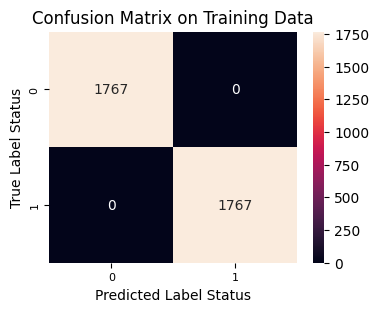

In [37]:
evaluation_report(y_train, y_train_rf, title='Training Data')

Classification Report on Testing Data
              precision    recall  f1-score   support

           0       0.95      0.90      0.92       442
           1       0.90      0.96      0.93       442

    accuracy                           0.93       884
   macro avg       0.93      0.93      0.93       884
weighted avg       0.93      0.93      0.93       884



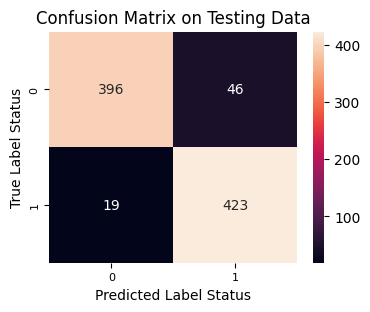

In [38]:
evaluation_report(y_test, y_test_rf, title='Testing Data')

## Hyperparameter Tuning

In [39]:
# Hyperparameter tuning on base model using Grid Search Cross Validation
param_grid = {
    'n_estimators': [100, 250, 500],
    'criterion': ['gini', 'entropy'],
    'max_depth': [3, 10, 20],
    'min_samples_split': [2, 3, 5],
    'min_samples_leaf': [1, 2, 5, 10],
    'max_features': ['sqrt', 'log2'],
    'oob_score': [False],
    'class_weight': ['balanced']
}

clf = GridSearchCV(estimator=model_rf, param_grid=param_grid, cv=3, n_jobs=-1, verbose=3)
clf

GridSearchCV(cv=3, estimator=RandomForestClassifier(class_weight='balanced'),
             n_jobs=-1,
             param_grid={'class_weight': ['balanced'],
                         'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 10, 20],
                         'max_features': ['sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 5, 10],
                         'min_samples_split': [2, 3, 5],
                         'n_estimators': [100, 250, 500],
                         'oob_score': [False]},
             verbose=3)

In [40]:
# Fit for the best model params estimators
best_model = clf.fit(X_train, y_train)
best_model.best_estimator_

Fitting 3 folds for each of 432 candidates, totalling 1296 fits


RandomForestClassifier(class_weight='balanced', criterion='entropy',
                       max_depth=20, min_samples_leaf=2, min_samples_split=3,
                       n_estimators=250)

Classification Report on Training Data Best Model
              precision    recall  f1-score   support

           0       0.99      0.97      0.98      1767
           1       0.97      0.99      0.98      1767

    accuracy                           0.98      3534
   macro avg       0.98      0.98      0.98      3534
weighted avg       0.98      0.98      0.98      3534



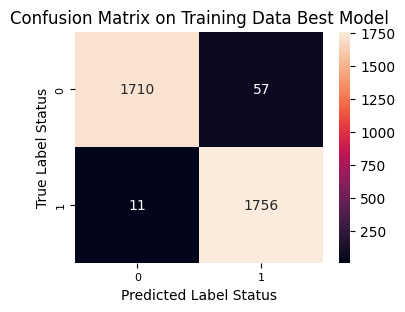

In [41]:
# Predict the training and testing data using the best model
y_train_best = best_model.predict(X_train)
y_test_best = best_model.predict(X_test)
evaluation_report(y_train, y_train_best, title='Training Data Best Model')

Classification Report on Testing Data Best Model
              precision    recall  f1-score   support

           0       0.96      0.88      0.91       442
           1       0.89      0.96      0.92       442

    accuracy                           0.92       884
   macro avg       0.92      0.92      0.92       884
weighted avg       0.92      0.92      0.92       884



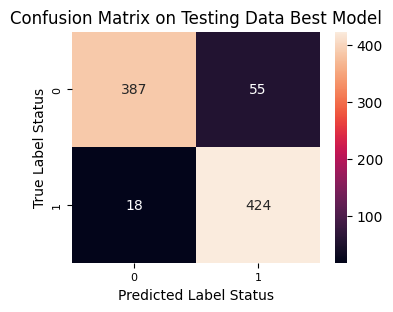

In [42]:
evaluation_report(y_test, y_test_best, title='Testing Data Best Model')

In [44]:
from joblib import dump
dump(best_model, 'random_forest_model.joblib')

['random_forest_model.joblib']

In [ ]:
!pip freeze > requirements.txt